In [3]:
import numpy as np
import matplotlib.pyplot as plt
import snap

In [2]:
G = snap.LoadEdgeList(snap.TNGraph, 'Wiki-Vote.txt')
print(f"Number of Nodes: {G.GetNodes()}")
print(f"Number of Edges: {G.GetEdges()}")

Number of Nodes: 7115
Number of Edges: 103689


In [3]:
# Average Clustering Coefficient
clustering_coeff = G.GetClustCf()
print(f"Clustering coefficient: {clustering_coeff:.4f}")

Clustering coefficient: 0.1409


In [4]:
# Number of Weakly Connected Components(WCCs)
weak_components = G.GetWccs()
num_components = len(weak_components)
print(f"Number of Weakly Connected Components : {num_components}")
for component in weak_components:
    print(f"Size of component: {component.Len()}")

Number of Weakly Connected Components : 24
Size of component: 7066
Size of component: 3
Size of component: 3
Size of component: 3
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2
Size of component: 2


In [5]:
# Strongly Connected Components
strong_components = G.GetSccs()
num_components = len(strong_components)
print(f"Number of Weakly Connected Components : {num_components}")
biggest_component = strong_components[0]
print(f"Number of Nodes in the Biggest Strongly Connected Component : {len(biggest_component)}")

Number of Weakly Connected Components : 5816
Number of Nodes in the Biggest Strongly Connected Component : 1300


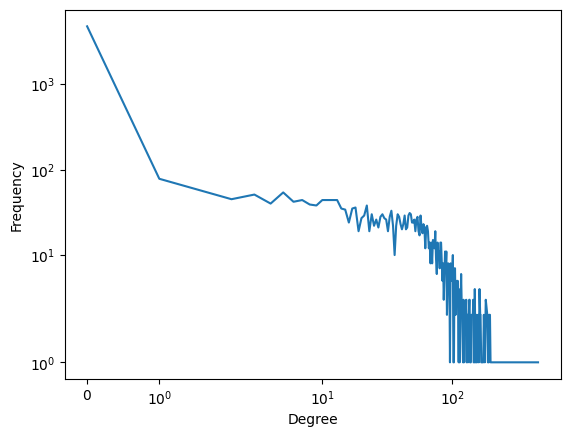

In [31]:
# In-Degree Distribution
degrees = {}
in_degrees = G.GetInDegCnt()
for item in in_degrees:
    degrees[item.GetVal1()] = item.GetVal2()

X_axis = list(degrees.keys())
y_axis = list(degrees.values())
plt.loglog(X_axis, y_axis)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

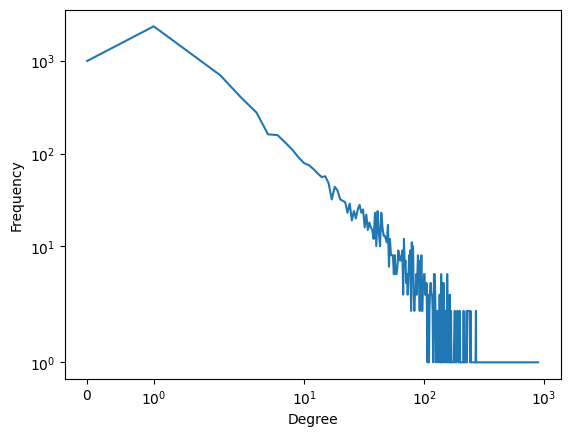

In [32]:
# Out-Degree Distribution
degrees = {}
out_degrees = G.GetOutDegCnt()
for item in out_degrees:
    degrees[item.GetVal1()] = item.GetVal2()

X_axis = list(degrees.keys())
y_axis = list(degrees.values())
plt.loglog(X_axis, y_axis)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Part 2

### Functions

In [32]:
def create_adj_list(nodes, links):
    adj_list = {}
    for node in nodes:
        neighbors_list = []
        for link in links:
            if node in link:
                for v in link:
                    if v != node:
                        neighbors_list.append(v)

        adj_list[node] = neighbors_list

    return adj_list


def get_degree_counts(adj_list):
    degrees = {}
    for node in adj_list:
        degree_count = len(adj_list[node])
        if(degree_count not in degrees):
            degrees[degree_count] = 1
        else:
            degrees[degree_count] += 1

    return degrees


def get_average_degree(degree_counts):
    number_of_nodes = 0
    for k, v in degree_counts.items():
        number_of_nodes += v

    sum_degrees = 0
    for k,v in degree_counts.items():
        sum_degrees += v * k

    average_degree = sum_degrees / number_of_nodes
    print(f"Average Degree : {average_degree}")
    return average_degree


def compute_degree_distribution(degree_counts):
    number_of_nodes = 0
    for k, v in degree_counts.items():
        number_of_nodes += v

    degree_distribution = {}
    for k,v in degree_counts.items():
        degree_distribution[k] = v / number_of_nodes

    return dict(sorted(degree_distribution.items()))


def compute_excess_degree_distribution(degree_distribution, average_degree):
    excess_degree_distribution = {}
    # excess degree distribution is computed for all degrees in degree distribution minus the last one
    for k in range(len(degree_distribution)):
        key = list(degree_distribution.keys())[k]
        if((key+1) in degree_distribution.keys()):
            excess_degree_distribution[key] = ((key + 1) / average_degree) * degree_distribution[key+1]
        else:
            excess_degree_distribution[key] = 0.0

    return excess_degree_distribution


def plot_excess_degree_distribution(excess_degree_distribution):
    X_axis = list(excess_degree_distribution.keys())
    y_axis = list(excess_degree_distribution.values())
    plt.loglog(X_axis, y_axis)
    plt.xlabel('Degree')
    plt.ylabel('Excess Degree Distribution')
    plt.show()

### Random Graph

In [33]:
def create_random_graph(N, M):
    nodes = []
    for i in range(N):
        nodes.append(i)

    links = []
    number_of_links = 0
    while(number_of_links < M):
            node1 = np.random.randint(0, N)
            node2 = np.random.randint(0, N)
            if ((node1, node2) not in links) and (node1 != node2):
                links.append((node1, node2))
                number_of_links += 1
            else:
                continue 

    return nodes, links

N = 5242
M = 14484
random_nodes, random_links = create_random_graph(N, M)
print(f"Number of Nodes: {len(random_nodes)}")
print(f"Number of Edges: {len(random_links)}")

Number of Nodes: 5242
Number of Edges: 14484


Average Degree : 5.526135062953071


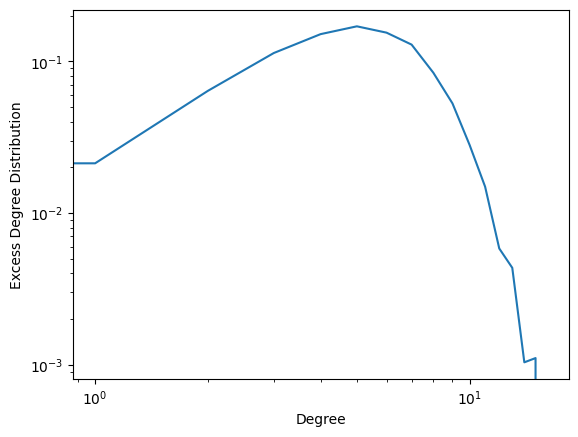

In [34]:
# Creating the adjacency list
random_adj_list = create_adj_list(random_nodes, random_links)

# Getting degree counts
random_degree_counts = get_degree_counts(random_adj_list)

# Getting the average degree
random_average_degree = get_average_degree(random_degree_counts)

# Computing the degree distribution
random_degree_distribution = compute_degree_distribution(random_degree_counts)

# Computing excess degree distribution
random_excess_degree_distribution = compute_excess_degree_distribution(random_degree_distribution, random_average_degree)

# Plot the excess degree distribution
plot_excess_degree_distribution(random_excess_degree_distribution)

### Small-World Graph

In [35]:
def create_small_world_graph(N, c, shortcuts):
    # Create nodes list
    nodes = []
    for i in range(N):
        nodes.append(i)

    # Creating the links
    links = []

    for i in range(N):
        for j in range(1, c+1):
            link_forward = (i, (i+j) % N)
            link_backward = ((i-j) % N, i)
            if(link_forward not in links):
                    links.append(link_forward)
            if(link_backward not in links):
                    links.append(link_backward)

    for i in range(shortcuts):
        node1 = node2 = 0
        while(True):
            node1 = np.random.randint(0, N)
            node2 = np.random.randint(0, N)
            if((node1, node2) in links or node1 == node2):
                continue
            else:
                break

        links.append((node1, node2))

    return nodes, links

N = 5242
c = 2
number_of_shortcuts = 4000
small_nodes, small_links = create_small_world_graph(N, c, number_of_shortcuts)
print(f"Number of Nodes: {len(small_nodes)}")
print(f"Number of Edges: {len(small_links)}")

Number of Nodes: 5242
Number of Edges: 14484


{7: 665, 4: 1134, 10: 27, 6: 1366, 5: 1727, 9: 80, 8: 239, 11: 4}
Average Degree : 5.526135062953071
{4: 0.21632964517359787, 5: 0.32945440671499426, 6: 0.26058756199923694, 7: 0.12685997710797406, 8: 0.04559328500572301, 9: 0.015261350629530714, 10: 0.005150705837466615, 11: 0.0007630675314765357}
{4: 0.29808754487710576, 5: 0.28293289146644574, 6: 0.16069455951394643, 7: 0.0660038663352665, 8: 0.024855012427506214, 9: 0.00932062966031483, 10: 0.0015189174261253798, 11: 0.0}


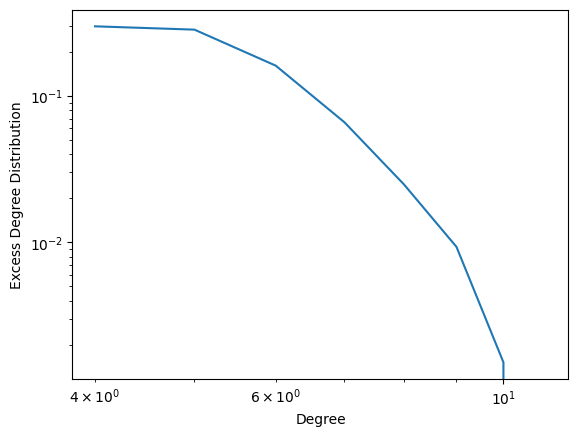

In [36]:
# Creating the adjacency list
small_adj_list = create_adj_list(small_nodes, small_links)

# Getting degree counts
small_world_degree_counts = get_degree_counts(small_adj_list)
print(small_world_degree_counts)

# Getting the average degree
small_world_average_degree = get_average_degree(small_world_degree_counts)

# Computing the degree distribution
small_world_degree_distribution = compute_degree_distribution(small_world_degree_counts)
print(small_world_degree_distribution)

# Computing excess degree distribution
small_world_excess_degree_distribution = compute_excess_degree_distribution(small_world_degree_distribution, small_world_average_degree)
print(small_world_excess_degree_distribution)

# Plot the excess degree distribution
plot_excess_degree_distribution(small_world_excess_degree_distribution)

### Real-World Graph

In [37]:
def create_real_world_graph(file_name):
    with open(file_name) as f:
        lines = f.readlines()

    new_lines = []
    for line in lines:
        line = line.replace('\n', '')   # Remove '\n' from lines
        new_lines.append(line)

    # Create lists for nodes and links
    links = []
    nodes = []
    for line in new_lines:
        a, b = line.split()
        a = int(a)
        b = int(b)

        link = (a,b)
        reversed_link = (b, a)

        # Remove duplicate links and self-edges
        if (link not in links) and (reversed_link not in links) and (a != b):
            links.append((a,b))

        # We first add the nodes then remove the duplicates(it's much faster)
        nodes.append(a)
        nodes.append(b)

    nodes = [*set(nodes)]

    return nodes, links

real_nodes, real_links = create_real_world_graph("CA-GrQc.txt")

print(f"Number of Nodes:{len(real_nodes)}")
print(f"Number of Links:{len(real_links)}")

Number of Nodes:5242
Number of Links:14484


Average Degree : 5.526135062953071


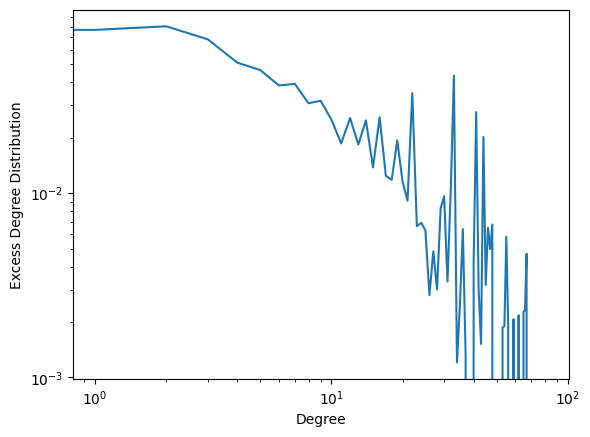

In [38]:
# Creating the adjacency list
real_adj_list = create_adj_list(real_nodes, real_links)

# Getting degree counts
real_world_degree_counts = get_degree_counts(real_adj_list)

# Getting the average degree
real_world_average_degree = get_average_degree(real_world_degree_counts)

# Computing the degree distribution
real_world_degree_distribution = compute_degree_distribution(real_world_degree_counts)

# Computing excess degree distribution
real_world_excess_degree_distribution = compute_excess_degree_distribution(real_world_degree_distribution, real_world_average_degree)

# Plot the excess degree distribution
plot_excess_degree_distribution(real_world_excess_degree_distribution)

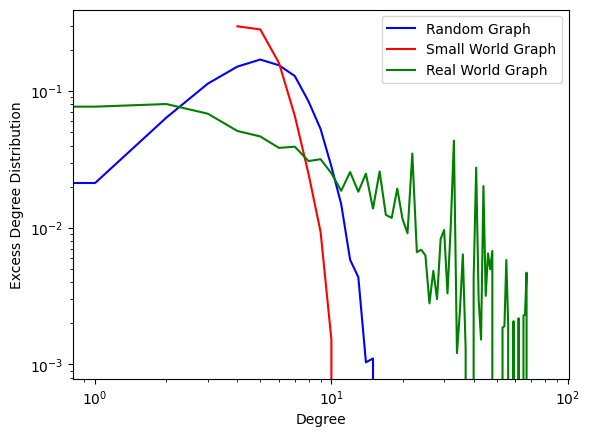

In [39]:
# Plot All 3 curves in 1 figure
X_random = list(random_excess_degree_distribution.keys())
y_random = list(random_excess_degree_distribution.values())

X_small = list(small_world_excess_degree_distribution.keys())
y_small = list(small_world_excess_degree_distribution.values())

X_real = list(real_world_excess_degree_distribution.keys())
y_real = list(real_world_excess_degree_distribution.values())

plt.loglog(X_random, y_random, 'b', label='Random Graph')
plt.loglog(X_small, y_small, 'r-', label='Small World Graph')
plt.loglog(X_real, y_real, 'g-', label='Real World Graph')

plt.xlabel('Degree')
plt.ylabel('Excess Degree Distribution')
plt.legend()

plt.show()